Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
## If you are using the data by mounting the google drive, use the following :
from google.colab import drive
drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

Mounted at /content/gdrive


# Extract Data Set file in gdrive

In [ ]:
!ls /content/gdrive/MyDrive/DataSets/

CNN_assignment.zip


In [ ]:
!unzip /content/gdrive/MyDrive/DataSets/CNN_assignment.zip -d /content/gdrive/MyDrive/DataSets/
print("Extraction Successfull")


Archive:  /content/gdrive/MyDrive/DataSets/CNN_assignment.zip
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010512.jpg  
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0010889.jpg  
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024468.jpg  
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024470.jpg  
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024511.jpg  
  inflating: /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/actinic keratosis/ISIC_0024646.jpg  
  inflating: /content/gdrive/MyDrive/D

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

## Step1: Read Data and Create test and train data sets

In [ ]:
!ls /content/gdrive/MyDrive/DataSets/

 CNN_assignment.zip  'Skin cancer ISIC The International Skin Imaging Collaboration'


In [3]:
test_directory="/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/"
train_directory="/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/"
print(test_directory, train_directory)



/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Test/ /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/


In [4]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path(train_directory)
data_dir_test = pathlib.Path(test_directory)

In [5]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

# Create a dataset

Define some parameters for the loader:
## Step2: Train and Validation data set to trained using batch_size=32 against image dimension 180 x 180

In [6]:
batch_size = 32
img_height = 180
img_width = 180

Use 80% of the images for training, and 20% for validation.

In [ ]:
!ls /content/gdrive/MyDrive/DataSets/Skin\ cancer\ ISIC\ The\ International\ Skin\ Imaging\ Collaboration/Train/

'actinic keratosis'	 melanoma		      'seborrheic keratosis'
'basal cell carcinoma'	 nevus			      'squamous cell carcinoma'
 dermatofibroma		'pigmented benign keratosis'  'vascular lesion'


In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 5392 files for training.


In [11]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = tf.keras.utils.image_dataset_from_directory(
  train_directory,
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


In [9]:
# List out all the classes of skin cancer and store them in a list.
# You can find the class names in the class_names attribute on these datasets.
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)
num_classes = len(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


# Visualize the data
## Step3: Todo, create a code to visualize one instance of all the nine classes present in the dataset

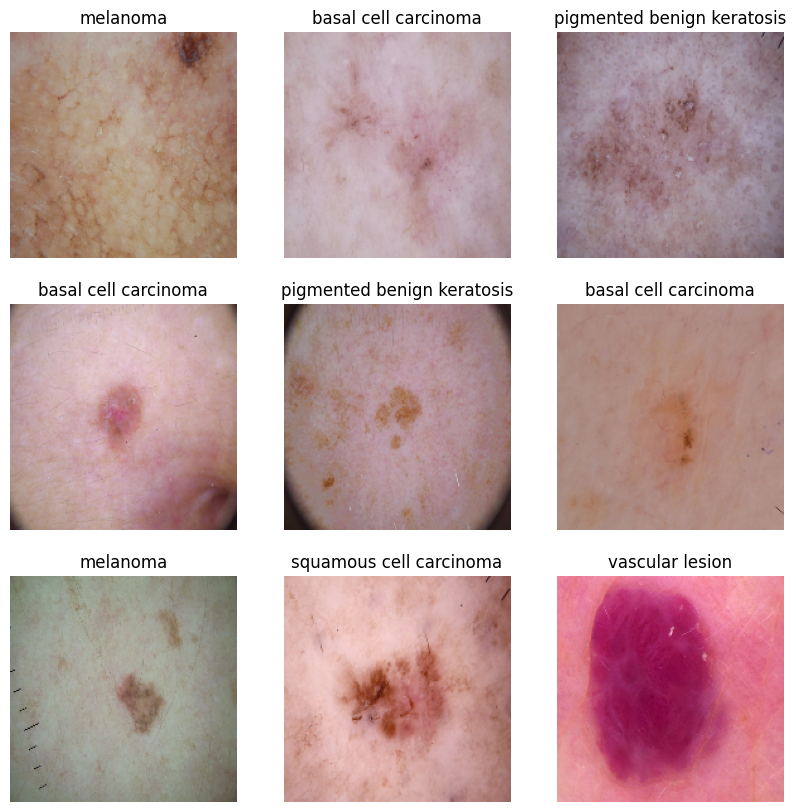

In [ ]:
import matplotlib.pyplot as plt

def displayImage(image):
    plt.imshow(image)
    plt.show()

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(33):
  for i in range(num_classes):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")


#plt.figure(figsize=(10, 10))
#class_names = train_ds.class_names
#for images, labels in train_ds.take(1):
#    for i in range(32):
#        ax = plt.subplot(6, 6, i + 1)
#        plt.imshow(images[i].numpy().astype("uint8"))
#        plt.title(class_names[labels[i]])
#        plt.axis("off")
### your code goes here, you can use training or validation data to visualize

The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [12]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

*	Model Building & training :
*	Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model, rescale images to normalize pixel values between (0,1).
*	Choose an appropriate optimiser and loss function for model training
*	Train the model for ~20 epochs
*	Write your findings after the model fit. You must check if there is any evidence of model overfit or underfit.



In [13]:
### Your code goes here
normalization_layer = layers.Rescaling(1./255)

In [ ]:
## Resize using Sequential
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])

In [ ]:
## Build Model for the images

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_2 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)       

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 642s 3s/step - loss: 2.0476 - accuracy: 0.2517 - val_loss: 1.8597 - val_accuracy: 0.3244
Epoch 2/20
56/56 [==============================] - 58s 1s/step - loss: 1.7360 - accuracy: 0.3756 - val_loss: 1.5411 - val_accuracy: 0.5302
Epoch 3/20
56/56 [==============================] - 57s 1s/step - loss: 1.4772 - accuracy: 0.4849 - val_loss: 1.5105 - val_accuracy: 0.4899
Epoch 4/20
56/56 [==============================] - 70s 1s/step - loss: 1.3516 - accuracy: 0.5379 - val_loss: 1.3997 - val_accuracy: 0.5145
Epoch 5/20
56/56 [==============================] - 68s 1s/step - loss: 1.2573 - accuracy: 0.5619 - val_loss: 1.3158 - val_accuracy: 0.5369
Epoch 6/20
56/56 [==============================] - 63s 1s/step - loss: 1.1634 - accuracy: 0.5910 - val_loss: 1.4139 - val_accuracy: 0.5302
Epoch 7/20
56/56 [==============================] - 63s 1s/step - loss: 1.0924 - accuracy: 0.6122 - val_loss: 1.4154 - val_accuracy: 0.5459
Epoch 8/20
56/56 [=

### Visualizing training results

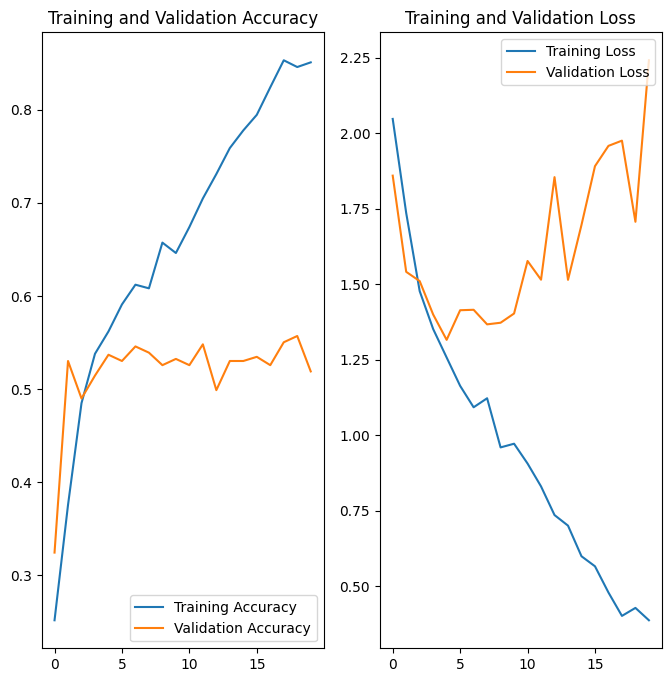

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

The model is working good on Training data set but validation is stuck at just above 0.5, which signifies the model may be overfitting.

Training loss is minimizing with each epoch as training continuous however validation loss has decreased then increased

### Write your findings here

## 2 Ways to augmente data
* Use the Keras preprocessing layers, such as tf.keras.layers.Resizing, tf.keras.layers.Rescaling, tf.keras.layers.RandomFlip, and tf.keras.layers.RandomRotation.
* Use the tf.image methods, such as tf.image.flip_left_right, tf.image.rgb_to_grayscale, tf.image.adjust_brightness, tf.image.central_crop, and tf.image.stateless_random*.
Setup


In [ ]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy.
# 2 ways to augmentation data:
# Data augmentation using horizontal and vertical flip
# Your code goes here
data_augmentation = keras.Sequential(
  [
    layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)

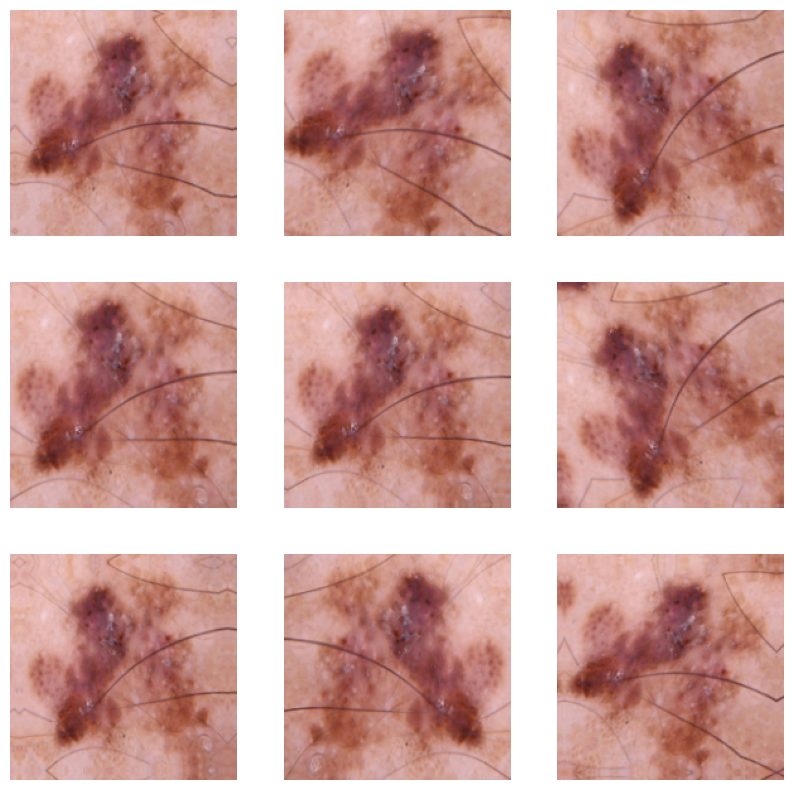

In [ ]:
# Todo, visualize how your augmentation strategy works for one instance of training image.
# Your code goes here
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(augmented_images[0].numpy().astype("uint8"))
    plt.axis("off")




### Todo:
### Create the model, compile and train the model


In [ ]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

## Your code goes here
model = Sequential([
  data_augmentation,
  #layers.Rescaling(1./255),
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes, name="outputs")
])


### Compiling the model

In [ ]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#model.build(img_height, img_width, 3)

In [ ]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential_11 (Sequential)  (None, 180, 180, 3)       0         
                                                                 
 rescaling_11 (Rescaling)    (None, 180, 180, 3)       0         
                                                                 
 conv2d_21 (Conv2D)          (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d_21 (MaxPooli  (None, 90, 90, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_22 (Conv2D)          (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_22 (MaxPooli  (None, 45, 45, 32)        0         
 ng2D)                                               

### Training the model

In [ ]:
## Your code goes here, note: train your model for 20 epochs
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 72s 1s/step - loss: 1.9996 - accuracy: 0.2701 - val_loss: 1.7633 - val_accuracy: 0.4094
Epoch 2/20
56/56 [==============================] - 68s 1s/step - loss: 1.6549 - accuracy: 0.4029 - val_loss: 1.5752 - val_accuracy: 0.4631
Epoch 3/20
56/56 [==============================] - 67s 1s/step - loss: 1.5729 - accuracy: 0.4347 - val_loss: 1.5959 - val_accuracy: 0.4497
Epoch 4/20
56/56 [==============================] - 66s 1s/step - loss: 1.5212 - accuracy: 0.4537 - val_loss: 1.5012 - val_accuracy: 0.4787
Epoch 5/20
56/56 [==============================] - 67s 1s/step - loss: 1.4318 - accuracy: 0.4833 - val_loss: 1.4383 - val_accuracy: 0.5168
Epoch 6/20
56/56 [==============================] - 66s 1s/step - loss: 1.3893 - accuracy: 0.5073 - val_loss: 1.4973 - val_accuracy: 0.5034
Epoch 7/20
56/56 [==============================] - 65s 1s/step - loss: 1.3675 - accuracy: 0.5212 - val_loss: 1.4032 - val_accuracy: 0.5391
Epoch 8/20
56/56 [==

### Visualizing the results

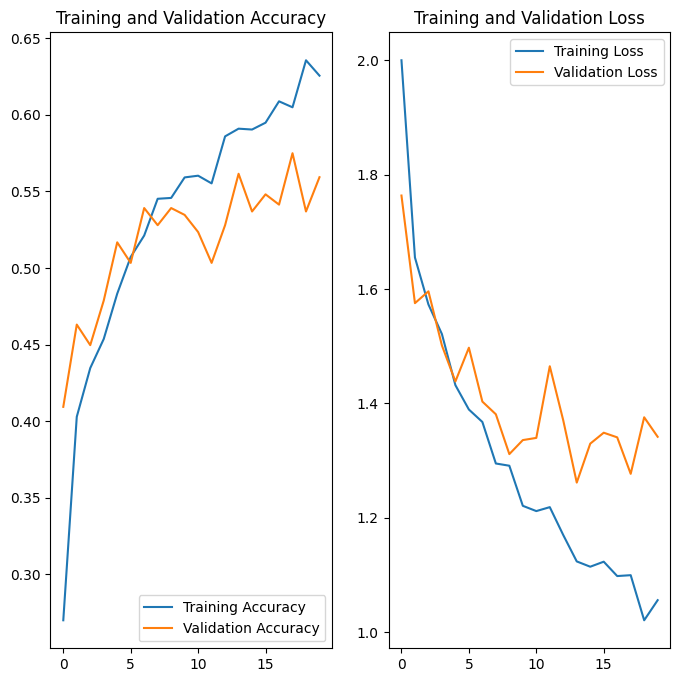

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

Training accuracy dropped to 60% however validation accuracy improved to 55%
Training loss minimized, so is the validation loss.

Model is performing fairly better than 1st model, however still there is scope of improvement

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [ ]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)


(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3)
(32,)
(32, 180, 180, 3

In [ ]:
class_names

['actinic keratosis',
 'basal cell carcinoma',
 'dermatofibroma',
 'melanoma',
 'nevus',
 'pigmented benign keratosis',
 'seborrheic keratosis',
 'squamous cell carcinoma',
 'vascular lesion']

In [14]:
import glob
path_list_old = [x for x in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(path_list_old)

2239

In [15]:
lesion_list_old = [os.path.basename(os.path.dirname(y)) for y in glob.glob(os.path.join(data_dir_train, '*', '*.jpg'))]
len(lesion_list_old)

2239

In [16]:
print(path_list_old[1333])
print(lesion_list_old[1333])

/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/ISIC_0000537.jpg
nevus


In [17]:
dataframe_dict_old = dict(zip(path_list_old, lesion_list_old))

In [18]:
original_df = pd.DataFrame(list(dataframe_dict_old.items()),columns = ['Path','Label'])
original_df['Label'].value_counts()

Label
pigmented benign keratosis    462
melanoma                      438
basal cell carcinoma          376
nevus                         357
squamous cell carcinoma       181
vascular lesion               139
actinic keratosis             114
dermatofibroma                 95
seborrheic keratosis           77
Name: count, dtype: int64

<Axes: xlabel='Label'>

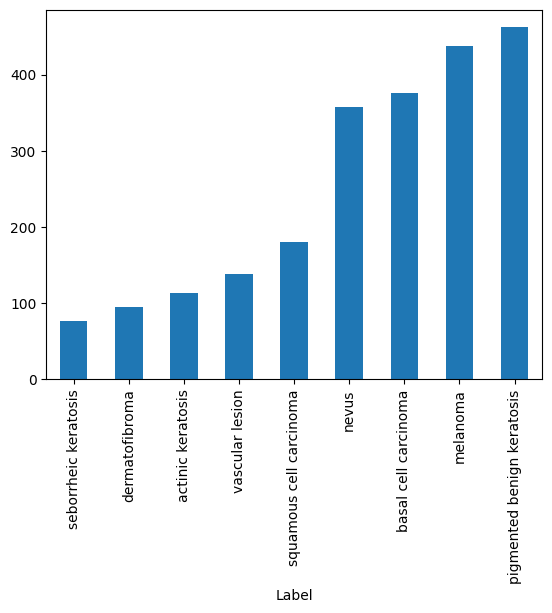

In [19]:
original_df.Label.value_counts().sort_values().plot(kind = 'bar')

#### **Todo:** Write your findings here:
#### - Which class has the least number of samples?
#### - Ans: Seborrheic keratosis has least number of samples
#### - Which classes dominate the data in terms proportionate number of samples?
#### - Ans: pigmented benign keratosis and melanoma dominate the samples


#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

## Step4: to chose Appropriate Data Augmentation Strategy to resolve underfitting/overfitting
*	Chose an appropriate data augmentation strategy to resolve underfitting/overfitting
*	Model Building & training on the augmented data :
*	Create a CNN model, which can accurately detect 9 classes present in the dataset. While building the model rescale images to normalize pixel values between (0,1).
*	Choose an appropriate optimiser and loss function for model training
*	Train the model for ~20 epochs
*	Write your findings after the model fit, see if the earlier issue is resolved or not?
*	Class distribution: Examine the current class distribution in the training dataset
*	- Which class has the least number of samples?
*	- Which classes dominate the data in terms of the proportionate number of samples?
*	Handling class imbalances: Rectify class imbalances present in the training dataset with Augmentor library.


In [ ]:
!pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [ ]:
path_to_training_dataset = train_directory
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Initialised with 114 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7C768C1EBF70>: 100%|██████████| 500/500 [00:23<00:00, 21.48 Samples/s]


Initialised with 376 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768C20BA30>: 100%|██████████| 500/500 [00:23<00:00, 21.21 Samples/s]


Initialised with 95 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768C1BA920>: 100%|██████████| 500/500 [00:26<00:00, 18.89 Samples/s]


Initialised with 438 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7C768C1DF4C0>: 100%|██████████| 500/500 [01:46<00:00,  4.71 Samples/s]


Initialised with 357 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768D381780>: 100%|██████████| 500/500 [01:41<00:00,  4.91 Samples/s]


Initialised with 462 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768C0B7730>: 100%|██████████| 500/500 [00:25<00:00, 19.89 Samples/s]


Initialised with 77 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/seborrheic keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=1024x768 at 0x7C768C1DC1C0>: 100%|██████████| 500/500 [00:50<00:00,  9.90 Samples/s]


Initialised with 181 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768DE5CA90>: 100%|██████████| 500/500 [00:26<00:00, 18.89 Samples/s]


Initialised with 139 image(s) found.
Output directory set to /content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7C768DF29E10>: 100%|██████████| 500/500 [00:24<00:00, 20.20 Samples/s]


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [ ]:
from glob import glob
len(list(glob("/mnt/content/gdrive/*")))

0

In [20]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [21]:
#import glob
path_list = [x for x in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(path_list))
print(path_list[10])


4500
/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output/actinic keratosis_original_ISIC_0029781.jpg_4d783df1-5f06-49dc-b700-efcca8c51f00.jpg


In [22]:
lesion_list_new = [os.path.basename(os.path.dirname(os.path.dirname(y))) for y in glob.glob(os.path.join(data_dir_train, '*','output', '*.jpg'))]
print(len(lesion_list_new))
print(lesion_list_new[10])

4500
actinic keratosis


In [23]:
dataframe_dict_new = dict(zip(path_list, lesion_list_new))

In [24]:
df2 = pd.DataFrame(list(dataframe_dict_new.items()),columns = ['Path','Label'])
new_df = pd.concat([original_df, df2],ignore_index=True)

In [25]:
new_df['Label'].value_counts()

Label
pigmented benign keratosis    962
melanoma                      938
basal cell carcinoma          876
nevus                         857
squamous cell carcinoma       681
vascular lesion               639
actinic keratosis             614
dermatofibroma                595
seborrheic keratosis          577
Name: count, dtype: int64

<Axes: xlabel='Label'>

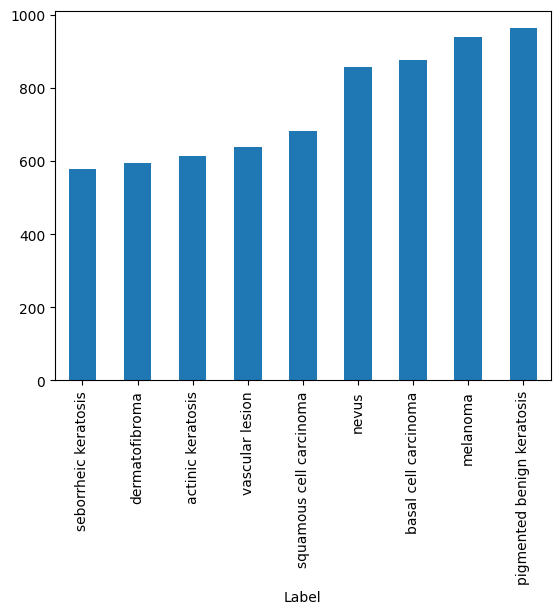

In [26]:
new_df.Label.value_counts().sort_values().plot(kind = 'bar')

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [27]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [ ]:
#from pathlib import Path
#p = Path(train_directory)
#data_dir_train=[x for x in p.iterdir() if x.is_dir()]
#data_dir_train = [x[0] for x in os.walk(train_directory)]
#print(data_dir_train)

['/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/actinic keratosis/output', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/basal cell carcinoma/output', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/dermatofibroma/output', '/content/gdrive/MyDrive/DataSets/Skin cancer ISIC The International Skin Imaging Collaboration/Train/melanoma', '/content/gdrive/MyDrive/Dat

In [ ]:

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size  =(img_height, img_width),
  batch_size=batch_size)

#train_ds = tf.keras.utils.image_dataset_from_directory(
#  train_directory,
#  validation_split=0.2,
#  subset="training",
#  seed=123,
#  image_size=(img_height, img_width),
#  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [ ]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_test,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',## Todo choose the correct parameter value, so that only validation data is refered to,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 118 files belonging to 9 classes.
Using 23 files for validation.


#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [28]:
### Your code goes here
normalization_layer = layers.Rescaling(1./255)

In [29]:
## Resize using Sequential
resize_and_rescale = tf.keras.Sequential([
  layers.Resizing(img_height, img_width),
  layers.Rescaling(1./255)
])

In [30]:
## Build Model for the images

model = Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.BatchNormalization(),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.BatchNormalization(),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training

In [31]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
# View the summary of all layers
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_3 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 180, 180, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 batch_normalization_1 (Bat  (None, 90, 90, 32)       

### Train the model

In [33]:
epochs = 30
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/30
169/169 [==============================] - 997s 3s/step - loss: 1.5051 - accuracy: 0.4811 - val_loss: 9.7414 - val_accuracy: 0.1351
Epoch 2/30
169/169 [==============================] - 303s 2s/step - loss: 0.9266 - accuracy: 0.6782 - val_loss: 10.3093 - val_accuracy: 0.0638
Epoch 3/30
169/169 [==============================] - 308s 2s/step - loss: 0.5748 - accuracy: 0.8118 - val_loss: 3.1997 - val_accuracy: 0.3831
Epoch 4/30
169/169 [==============================] - 308s 2s/step - loss: 0.3773 - accuracy: 0.8774 - val_loss: 1.0627 - val_accuracy: 0.6221
Epoch 5/30
169/169 [==============================] - 316s 2s/step - loss: 0.2149 - accuracy: 0.9327 - val_loss: 0.6459 - val_accuracy: 0.7862
Epoch 6/30
169/169 [==============================] - 312s 2s/step - loss: 0.1428 - accuracy: 0.9522 - val_loss: 0.6891 - val_accuracy: 0.7817
Epoch 7/30
169/169 [==============================] - 310s 2s/step - loss: 0.1075 - accuracy: 0.9611 - val_loss: 0.9180 - val_accuracy: 0.740

#### **Todo:**  Visualize the model results

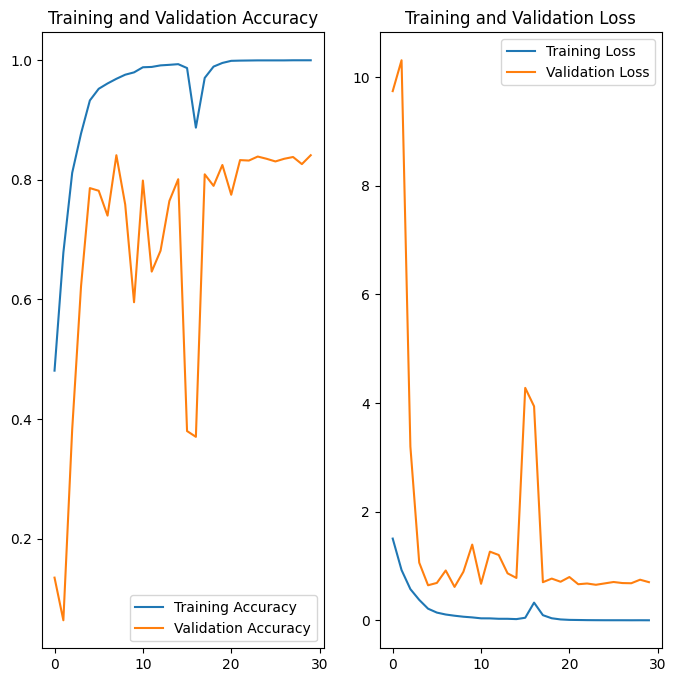

In [34]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?
* Both Test and Validation accuracy are improved to 80%, pointing to model not underfitting / overfitting
* Validation loss is greatly reduced on accuracy
* Handling the class imbalance through augmentation helped to get rid of underfitting or overfitting in the training data set.


